In [ ]:
!pip install aeon[deep_learning]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


# **Deep Learning Based Clustering**
The aeon.clustering.deeplearning module provides powerful deep learning models designed specifically for time series clustering. These models leverage advanced architectures like **Auto-Encoders, Residual Networks, Dilated Convolutions, and Attention Mechanisms** to effectively identify patterns, trends, and groupings in complex temporal data. Each model is tailored to handle different data characteristics, improving clustering accuracy and performance across various domains such as healthcare, finance, and signal processing.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from aeon.datasets import load_arrow_head

In [ ]:
X_train, y_train = load_arrow_head(split="train")
X_test, y_test = load_arrow_head(split="test")

In [ ]:
print(X_train[:5])

[[[-1.9630089 -1.9578249 -1.9561449 ... -1.9053929 -1.9239049 -1.9091529]]

 [[-1.7745713 -1.7740359 -1.7765863 ... -1.7292269 -1.7756704 -1.7893245]]

 [[-1.8660211 -1.8419912 -1.8350253 ... -1.8625124 -1.8633682 -1.8464925]]

 [[-2.0737575 -2.0733013 -2.0446071 ... -2.0269634 -2.073405  -2.0752917]]

 [[-1.7462554 -1.7412629 -1.7227405 ... -1.7434421 -1.7627288 -1.7634281]]]


In [ ]:
print(y_train[:5])

['0' '1' '2' '0' '1']


# **AEFCNClusterer (Auto-Encoder Fully Convolutional Network)**
The **AEFCNClusterer** is a deep learning model that leverages a **Fully Convolutional Network (FCN)** architecture with an **Auto-Encoder** structure for clustering. It combines feature extraction with convolutional layers and reconstruction capabilities via auto-encoders.  
FCNs are effective for extracting spatial hierarchies in time series data without requiring fully connected layers, making them highly efficient.


In [ ]:
from aeon.clustering.deep_learning import AEFCNClusterer

In [ ]:
model = AEFCNClusterer(n_epochs=10, batch_size=3)
model.fit(X_train)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


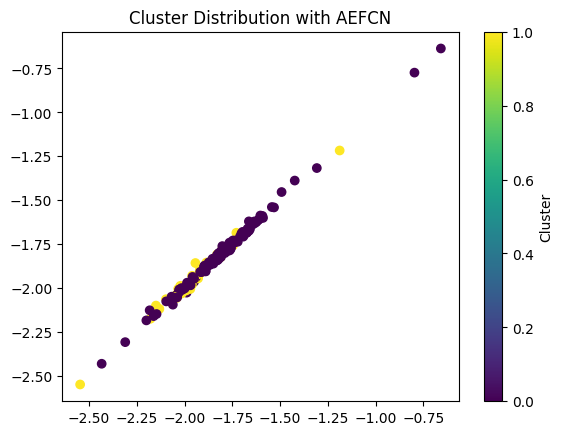

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="viridis")
plt.title("Cluster Distribution with AEFCN")
plt.colorbar(label="Cluster")
plt.show()

**Inferences from scatter plot:**

1.The model has categorized the data into at least two clusters, as indicated  
  by the color differences. However, the separation is not very distinct, meaning the clusters might overlap in feature space.

2.The data points appear to be aligned along a diagonal trend, which suggests
  that the dataset might have a strong correlation between the two plotted dimensions.

3.The majority of points belong to one dominant cluster (purple), while the
  second cluster (yellow) contains fewer points. This might indicate an imbalance in the dataset or that the model is biased toward grouping most points into one cluster.

# **AEResNetClusterer (Auto-Encoder Residual Network)**
The **AEResNetClusterer** applies an Auto-Encoder architecture integrated with a **Residual Network** (ResNet) backbone.ResNet models use skip connections, allowing gradients to flow directly through layers, reducing vanishing gradient issues.This approach enhances learning in deep networks and efficiently captures complex temporal patterns in time series data.


In [ ]:
from aeon.clustering.deep_learning import AEResNetClusterer

In [ ]:
model = AEResNetClusterer(n_epochs=10, random_state=42, batch_size=3)
model.fit(X_train)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


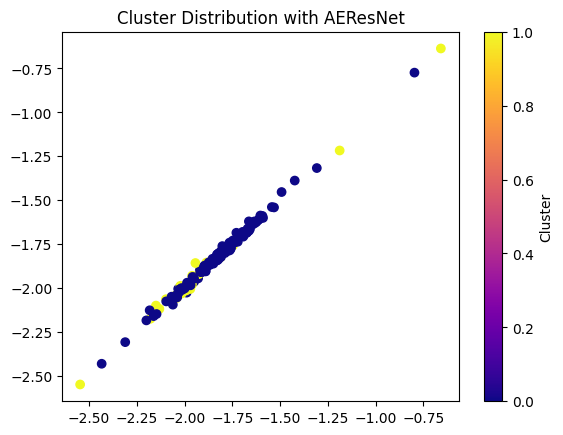

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="plasma")
plt.title("Cluster Distribution with AEResNet")
plt.colorbar(label="Cluster")
plt.show()

**Inferences of the scatter plot:**

1.Cluster Formation: The model has classified the data into two clusters, but
    similar to the AEFCN plot, the separation between them is not distinct. Most points belong to a single dominant cluster (dark purple), while a small number of points are assigned to the other cluster (yellow).

2.Linear Data Distribution: The points in the plot follow a diagonal pattern,
  indicating that the dataset might have a strong correlation between the features being visualized. This suggests that the data structure might be inherently linear.

3.Imbalance in Clusters: The clustering results show a highly imbalanced
  distribution, where one cluster contains most of the points. This could imply that either the model is struggling to identify meaningful cluster boundaries or that the dataset itself has an inherent class imbalance


# **AEDCNNClusterer (Auto-Encoder Dilated Convolutional Network)**
The **AEDCNNClusterer** is built on an **Auto-Encoder** with a **Dilated Convolutional Network (DCNN)** backbone.Dilated convolutions use dilated filters to expand the receptive field exponentially, allowing the model to capture long-term dependencies in the data without losing resolution.This method is ideal for detecting patterns over extended time windows.


In [ ]:
from aeon.clustering.deep_learning import AEDCNNClusterer

In [ ]:
model = AEDCNNClusterer(n_epochs=10, random_state=42, dilation_rate=1)
model.fit(X_train)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


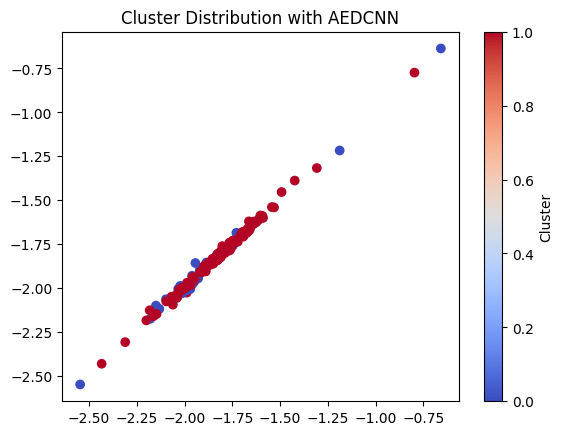

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="coolwarm")
plt.title("Cluster Distribution with AEDCNN")
plt.colorbar(label="Cluster")
plt.show()

#**Inferences from the scatter plot:**
1.   Compared to AEFCN and AEResNet, AEDCNN appears to have a slightly better spread of cluster labels across the data points.
2.   Most data points fall into one main cluster (red), with very few points classified into another cluster (blue).
3.   The points follow a strong diagonal trend, indicating that the underlying feature space has a continuous, linear structure rather than distinct groups.


# **AEDRNNClusterer (Auto-Encoder Dilated Recurrent Neural Network)**
The **AEDRNNClusterer** integrates an Auto-Encoder with a **Dilated Recurrent Neural Network (DRNN)** backbone.DRNNs combine the strengths of RNNs (sequence modeling) with dilated connections to capture patterns over long temporal sequences efficiently.they are Suitable for tasks where sequential relationships are vital (e.g., speech data, financial trends).



In [ ]:
from aeon.clustering.deep_learning import AEDRNNClusterer

In [ ]:
model = AEDRNNClusterer(n_epochs=10, random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


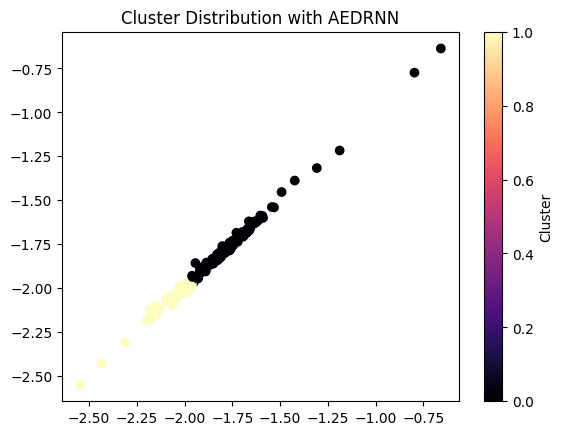

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="magma")
plt.title("Cluster Distribution with AEDRNN")
plt.colorbar(label="Cluster")
plt.show()

# **Inferences from the scatter plot:**
1.The scatter plot shows two clear clusters, one in black (cluster 0) and another in light yellow (cluster 1).Unlike completely mixed distributions, this separation indicates that AEDRNN has recognized some underlying structure in the data.

2.Similar to other models, the data points are aligned along a diagonal trend, indicating that the latent space follows a strong linear pattern.This suggests that AEDRNN’s clustering is more of a gradual transition rather than a hard separation.



# **AEAttentionBiGRUClusterer (Auto-Encoder Attention Bidirectional GRU Network)**
The **AEAttentionBiGRUClusterer** integrates an Auto-Encoder with an Attention-based **Bidirectional Gated Recurrent Unit (BiGRU)** network.
The Attention Mechanism allows the model to selectively focus on the most relevant parts of the time series during clustering.The Bidirectional GRU enhances this by processing the sequence from both forward and backward directions, improving sequence dependency recognition.It is Suitable for tasks requiring fine-grained sequence interpretation.Excels in datasets where certain segments of the sequence are more influential than others.




In [ ]:
from aeon.clustering.deep_learning import AEAttentionBiGRUClusterer

In [ ]:
model = AEAttentionBiGRUClusterer(n_epochs=10, random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 901ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 631ms/step


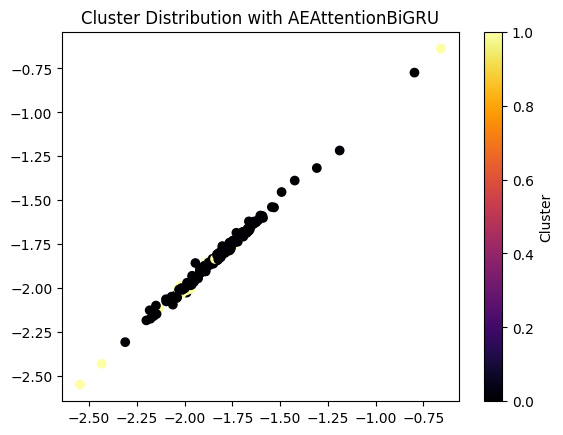

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="inferno")
plt.title("Cluster Distribution with AEAttentionBiGRU")
plt.colorbar(label="Cluster")
plt.show()

# **Inferences from the plot:**
1.The plot shows two distinct clusters: one in black (cluster 0) and another in
  light yellow (cluster 1).The dominance of black-colored points indicates that most of the data falls into a single cluster, with only a few points classified differently.

2.The few yellow points suggest that AEAttentionBiGRU is detecting some
  anomalies or outliers.
  
3.These yellow points are often found at the edges or slightly away from the   densest region, meaning that the model might be learning small variations and
  assigning them to a different cluster.


# **AEBiGRUClusterer (Auto-Encoder Bidirectional GRU Network)**
The **AEBiGRUClusterer** is an Auto-Encoder with a **Bidirectional GRU (BiGRU)** architecture.GRUs are similar to LSTMs but with a simpler structure, making them faster and more efficient for time series data.The bidirectional structure enhances the model’s ability to detect patterns by combining forward and backward sequence insights.It Performs well on shorter sequences with frequent fluctuations.Suitable for tasks requiring fast training without compromising performance.



In [ ]:
from aeon.clustering.deep_learning import AEBiGRUClusterer

In [ ]:
model = AEBiGRUClusterer(n_epochs=10, random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 918ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


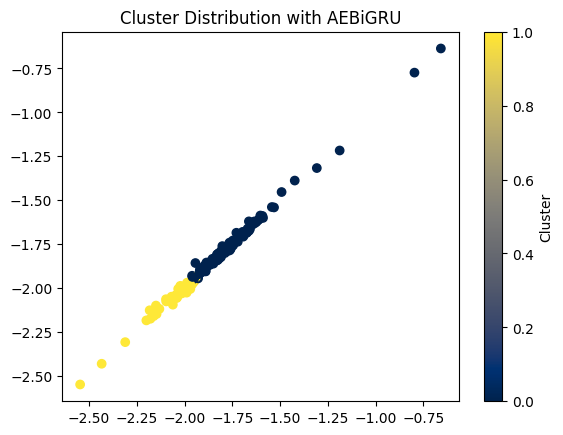

In [ ]:
plt.scatter(X_test[:, 0, 0], X_test[:, 0, 1], c=y_pred, cmap="cividis")
plt.title("Cluster Distribution with AEBiGRU")
plt.colorbar(label="Cluster")
plt.show()

#**Inferences from the scatter plot:**

1.The plot shows two distinct clusters (dark blue and yellow), indicating that AEBiGRU is effectively distinguishing between two groups.

2.Unlike previous models where yellow points were more scattered, AEBiGRU has a larger, more structured region assigned to cluster 1.

3.Since the clusters are positioned along a linear trend, this might imply that the underlying feature representation is influenced by a dominant latent factor.

**References:**

[1]Zhao et. al, Convolutional neural networks for time series classification,
Journal of Systems Engineering and Electronics, 28(1):2017.

[2]Wang et. al, Time series classification from scratch with deep neural networks: A strong baseline, International joint conference on neural networks (IJCNN), 2017.

